# [선형회귀분석 실습 3: 변수 선택 및 변수 변환]

## 1. 모듈 불러오기

In [1]:
# 데이터 전처리 패키지
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats

# 기계학습 모델 & 데이터 셋 & 성능 평가 패키지
import statsmodels.api as sm
import statsmodels.formula.api as smf

import pylab

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [2]:
california = fetch_california_housing()
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
print(california.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


## 2. 데이터 불러오기 및 전처리

In [4]:
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.DataFrame(california.target, columns=['House Value'])

In [5]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
data = pd.concat([X, y], axis=1)
train_data, test_data = train_test_split(data, test_size=0.3, random_state=55)

## 3. 모델링

In [7]:
lm = sm.OLS(train_data['House Value'], train_data.drop('House Value', axis=1))
lm_trained = lm.fit()
display(lm_trained.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            House Value   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                          1.518e+04
Date:                Thu, 13 May 2021   Prob (F-statistic):                        0.00
Time:                        15:20:11   Log-Likelihood:                         -16764.
No. Observations:               14448   AIC:                                  3.354e+04
Df Residuals:                   14440   BIC:                                  3.360e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.5216      0.005    101.582      0.000       0.512       0.532
HouseAge       0.0160      0.001     29.157      0.000       0.015       0.017
AveRooms      -0.1942      0.007    -25.898      0.000      -0.209      -0.179
AveBedrms      0.9733      0.038     25.292      0.000       0.898       1.049
Population  8.374e-06   6.08e-06      1.378      0.168   -3.54e-06    2.03e-05
AveOccup      -0.0042      0.001     -7.977      0.000      -0.005      -0.003
Latitude      -0.0635      0.004    -14.866      0.000      -0.072      -0.055
Longitude     -0.0154      0.001    -11.287      0.000      -0.018      -0.013
==============================================================================
Omnibus:                     2765.800   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7706.804
Skew:                           1.020   Prob(JB):                         0.00
Kurtosis:                       5.939   Cond. No.                     1.11e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
test_pred = lm_trained.predict(test_data.drop('House Value', axis=1))

## 4. 유의하지 않은 변수 제거하기
### p-value가 높은 "Populaion" 변수를 모델에서 제거

In [9]:
train_data_new = train_data.drop('Population', axis=1)
test_data_new = test_data.drop('Population', axis=1)

In [10]:
lm_new = sm.OLS(train_data_new['House Value'], train_data_new.drop('House Value', axis=1))
lm_new_trained = lm_new.fit()
display(lm_new_trained.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            House Value   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                          1.735e+04
Date:                Thu, 13 May 2021   Prob (F-statistic):                        0.00
Time:                        15:20:11   Log-Likelihood:                         -16765.
No. Observations:               14448   AIC:                                  3.354e+04
Df Residuals:                   14441   BIC:                                  3.360e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.5214      0.005    101.574      0.000       0.511       0.531
HouseAge       0.0158      0.001     30.274      0.000       0.015       0.017
AveRooms      -0.1945      0.007    -25.952      0.000      -0.209      -0.180
AveBedrms      0.9729      0.038     25.281      0.000       0.897       1.048
AveOccup      -0.0041      0.001     -7.883      0.000      -0.005      -0.003
Latitude      -0.0644      0.004    -15.216      0.000      -0.073      -0.056
Longitude     -0.0158      0.001    -11.914      0.000      -0.018      -0.013
==============================================================================
Omnibus:                     2755.138   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7695.331
Skew:                           1.016   Prob(JB):                         0.00
Kurtosis:                       5.942   Cond. No.                         785.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
test_pred_new = lm_new_trained.predict(test_data_new.drop('House Value', axis=1))

변수 제거 전후의 예측성능 비교하기

In [12]:
test_mse = mean_squared_error(test_data['House Value'], test_pred)
test_rmse = np.sqrt(mean_squared_error(test_data['House Value'], test_pred))
test_mae = mean_absolute_error(test_data['House Value'], test_pred)
test_mape = mean_absolute_percentage_error(test_data['House Value'], test_pred)

test_mse_new = mean_squared_error(test_data_new['House Value'], test_pred_new)
test_rmse_new = np.sqrt(mean_squared_error(test_data_new['House Value'], test_pred_new))
test_mae_new = mean_absolute_error(test_data_new['House Value'], test_pred_new)
test_mape_new = mean_absolute_percentage_error(test_data_new['House Value'], test_pred_new)

In [13]:
print('Testing MSE: {:.3f} → {:.3f}'.format(test_mse, test_mse_new))
print('Testing RMSE: {:.3f} → {:.3f}'.format(test_rmse, test_rmse_new))
print('Testing MAE: {:.3f} → {:.3f}'.format(test_mae, test_mae_new))
print('Testing MAPE: {:.3f} → {:.3f}'.format(test_mape, test_mape_new))

Testing MSE: 0.626 → 0.626
Testing RMSE: 0.791 → 0.791
Testing MAE: 0.574 → 0.574
Testing MAPE: 34.261 → 34.272


## 5. 상관계수가 높은 변수 제거하기
### correlation이 높은 변수 "AveRooms"와 "AveBedrms" 중 "AveBedrms" 변수 제거하기

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

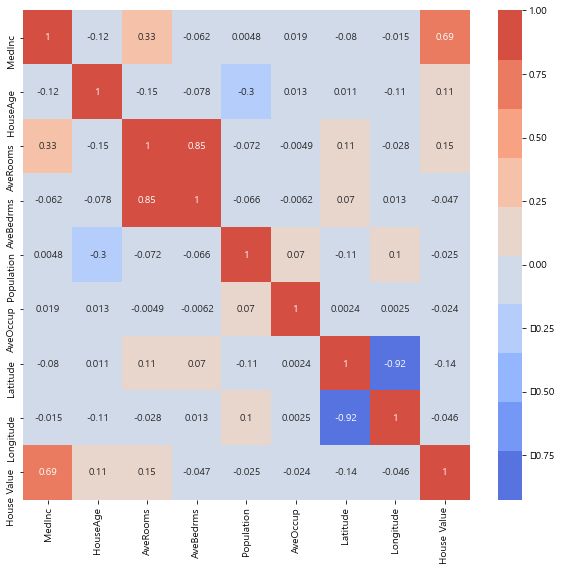

In [14]:
plt.figure(figsize=(10, 9))
sns.heatmap(data.corr(), cmap=sns.color_palette("coolwarm", 10), annot=data.corr())

In [15]:
train_data_new2 = train_data.drop('AveBedrms', axis=1)
test_data_new2 = test_data.drop('AveBedrms', axis=1)

In [16]:
lm_new2 = sm.OLS(train_data_new2['House Value'], train_data_new2.drop('House Value', axis=1))
lm_new2_trained = lm_new2.fit()
display(lm_new2_trained.summary())
test_pred_new2 = lm_new2_trained.predict(test_data_new2.drop('House Value', axis=1))

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            House Value   R-squared (uncentered):                   0.889
Model:                            OLS   Adj. R-squared (uncentered):              0.889
Method:                 Least Squares   F-statistic:                          1.652e+04
Date:                Thu, 13 May 2021   Prob (F-statistic):                        0.00
Time:                        15:20:13   Log-Likelihood:                         -17077.
No. Observations:               14448   AIC:                                  3.417e+04
Df Residuals:                   14441   BIC:                                  3.422e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.4311      0.004    114.555      0.000       0.424       0.438
HouseAge       0.0166      0.001     29.532      0.000       0.015       0.018
AveRooms      -0.0204      0.003     -6.649      0.000      -0.026      -0.014
Population  7.159e-06   6.21e-06      1.153      0.249   -5.02e-06    1.93e-05
AveOccup      -0.0038      0.001     -7.190      0.000      -0.005      -0.003
Latitude      -0.0869      0.004    -20.377      0.000      -0.095      -0.079
Longitude     -0.0262      0.001    -19.781      0.000      -0.029      -0.024
==============================================================================
Omnibus:                     2984.147   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7305.189
Skew:                           1.146   Prob(JB):                         0.00
Kurtosis:                       5.624   Cond. No.                     1.30e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

변수 제거 전후의 예측성능 비교하기

In [17]:
test_mse_new2 = mean_squared_error(test_data_new2['House Value'], test_pred_new2)
test_rmse_new2 = np.sqrt(mean_squared_error(test_data_new2['House Value'], test_pred_new2))
test_mae_new2 = mean_absolute_error(test_data_new2['House Value'], test_pred_new2)
test_mape_new2 = mean_absolute_percentage_error(test_data_new2['House Value'], test_pred_new2)
print('Testing MSE: {:.3f} → {:.3f}'.format(test_mse, test_mse_new2))
print('Testing RMSE: {:.3f} → {:.3f}'.format(test_rmse, test_rmse_new2))
print('Testing MAE: {:.3f} → {:.3f}'.format(test_mae, test_mae_new2))
print('Testing MAPE: {:.3f} → {:.3f}'.format(test_mape, test_mape_new2))

Testing MSE: 0.626 → 0.643
Testing RMSE: 0.791 → 0.802
Testing MAE: 0.574 → 0.592
Testing MAPE: 34.261 → 35.341


## 6. 변수 변환하기: 설명변수(X) or 반응변수(y) 변환

### 설명변수(X) 변환: MinMax 정규화(모든 설명변수 데이터 범위를 0~1로 맞춰주자)

In [18]:
data.drop('House Value', axis=1).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [19]:
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data.drop('House Value', axis=1))
data_normalized = pd.DataFrame(data_normalized, columns=data.drop('House Value', axis=1).columns)

## 정규화 후

In [20]:
data_normalized.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163


## 정규화 전

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data_normalized, data['House Value'], test_size=0.3, random_state=20190625)

In [22]:
lm_norm = sm.OLS(y_train, X_train)
lm_norm_trained = lm_norm.fit()
display(lm_norm_trained.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            House Value   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                          1.510e+04
Date:                Thu, 13 May 2021   Prob (F-statistic):                        0.00
Time:                        15:20:15   Log-Likelihood:                         -16791.
No. Observations:               14448   AIC:                                  3.360e+04
Df Residuals:                   14440   BIC:                                  3.366e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         7.8679      0.067    117.883      0.000       7.737       7.999
HouseAge       1.1197      0.025     44.144      0.000       1.070       1.169
AveRooms     -26.5694      1.006    -26.402      0.000     -28.542     -24.597
AveBedrms     32.7417      1.136     28.813      0.000      30.514      34.969
Population     2.4437      0.212     11.552      0.000       2.029       2.858
AveOccup      -6.2851      1.221     -5.149      0.000      -8.678      -3.892
Latitude      -0.4747      0.032    -14.705      0.000      -0.538      -0.411
Longitude     -0.4212      0.034    -12.556      0.000      -0.487      -0.355
==============================================================================
Omnibus:                     2627.132   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13708.737
Skew:                           0.781   Prob(JB):                         0.00
Kurtosis:                       7.509   Cond. No.                         196.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
y_pred = lm_norm_trained.predict(X_test)
y_pred.head()

4051     2.063705
17595    1.888440
7100     2.974386
7263     1.881730
12717    2.611984
dtype: float64

In [24]:
test_mse_norm = mean_squared_error(y_test, y_pred)
test_rmse_norm = np.sqrt(mean_squared_error(y_test, y_pred))
test_mae_norm = mean_absolute_error(y_test, y_pred)
test_mape_norm = mean_absolute_percentage_error(y_test, y_pred)
print('Testing MSE: {:.3f} → {:.3f}'.format(test_mse, test_mse_norm))
print('Testing RMSE: {:.3f} → {:.3f}'.format(test_rmse, test_rmse_norm))
print('Testing MAE: {:.3f} → {:.3f}'.format(test_mae, test_mae_norm))
print('Testing MAPE: {:.3f} → {:.3f}'.format(test_mape, test_mape_norm))

Testing MSE: 0.626 → 0.615
Testing RMSE: 0.791 → 0.784
Testing MAE: 0.574 → 0.568
Testing MAPE: 34.261 → 33.378


### 반응변수(y)를 변환: $y$ 대신 $\sqrt{y}$ 또는 $\log y$를 예측하는 모델 학습
-  $\sqrt{y}$ 

In [25]:
train_data_new3 = train_data.copy()
test_data_new3 = test_data.copy()

In [26]:
train_data_new3['House Value'] = np.sqrt(train_data_new3['House Value'].values)

lm_new3 = sm.OLS(train_data_new3['House Value'], train_data_new3.drop('House Value', axis=1))
lm_trained_new3 = lm_new3.fit()
display(lm_trained_new3.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            House Value   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                          5.375e+04
Date:                Thu, 13 May 2021   Prob (F-statistic):                        0.00
Time:                        15:20:17   Log-Likelihood:                         -997.44
No. Observations:               14448   AIC:                                      2011.
Df Residuals:                   14440   BIC:                                      2072.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.1702      0.002     98.726      0.000       0.167       0.174
HouseAge       0.0048      0.000     26.280      0.000       0.004       0.005
AveRooms      -0.0620      0.003    -24.641      0.000      -0.067      -0.057
AveBedrms      0.3085      0.013     23.875      0.000       0.283       0.334
Population  6.281e-06   2.04e-06      3.078      0.002    2.28e-06    1.03e-05
AveOccup      -0.0014      0.000     -7.899      0.000      -0.002      -0.001
Latitude      -0.0359      0.001    -24.980      0.000      -0.039      -0.033
Longitude     -0.0155      0.000    -33.914      0.000      -0.016      -0.015
==============================================================================
Omnibus:                     1173.191   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2598.618
Skew:                           0.520   Prob(JB):                         0.00
Kurtosis:                       4.799   Cond. No.                     1.11e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
test_pred_new3 = lm_trained_new3.predict(test_data_new3.drop('House Value', axis=1))
test_pred_new3.head()

6380     1.569566
5256     2.844583
2204     1.497855
18982    1.315532
14147    1.173572
dtype: float64

In [28]:
test_pred_new3 = np.square(test_pred_new3)
test_pred_new3.head()

6380     2.463536
5256     8.091655
2204     2.243570
18982    1.730623
14147    1.377271
dtype: float64

In [29]:
test_mse_new3 = mean_squared_error(test_data_new3['House Value'], test_pred_new3)
test_rmse_new3 = np.sqrt(mean_squared_error(test_data_new3['House Value'], test_pred_new3))
test_mae_new3 = mean_absolute_error(test_data_new3['House Value'], test_pred_new3)
test_mape_new3 = mean_absolute_percentage_error(test_data_new3['House Value'], test_pred_new3)
print('Testing MSE: {:.3f} → {:.3f}'.format(test_mse, test_mse_new3))
print('Testing RMSE: {:.3f} → {:.3f}'.format(test_rmse, test_rmse_new3))
print('Testing MAE: {:.3f} → {:.3f}'.format(test_mae, test_mae_new3))
print('Testing MAPE: {:.3f} → {:.3f}'.format(test_mape, test_mape_new3))

Testing MSE: 0.626 → 0.717
Testing RMSE: 0.791 → 0.847
Testing MAE: 0.574 → 0.574
Testing MAPE: 34.261 → 32.416


$\log y$

In [30]:
train_data_new4 = train_data.copy()
test_data_new4 = test_data.copy()

In [31]:
train_data_new4['House Value'] = np.log(train_data_new4['House Value'].values)

lm_new4 = sm.OLS(train_data_new4['House Value'], train_data_new4.drop('House Value', axis=1))
lm_trained_new4 = lm_new4.fit()
display(lm_trained_new4.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            House Value   R-squared (uncentered):                   0.756
Model:                            OLS   Adj. R-squared (uncentered):              0.756
Method:                 Least Squares   F-statistic:                              5607.
Date:                Thu, 13 May 2021   Prob (F-statistic):                        0.00
Time:                        15:20:18   Log-Likelihood:                         -7196.6
No. Observations:               14448   AIC:                                  1.441e+04
Df Residuals:                   14440   BIC:                                  1.447e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.2406      0.003     90.849      0.000       0.235       0.246
HouseAge       0.0065      0.000     22.875      0.000       0.006       0.007
AveRooms      -0.0883      0.004    -22.831      0.000      -0.096      -0.081
AveBedrms      0.4252      0.020     21.424      0.000       0.386       0.464
Population  1.537e-05   3.13e-06      4.904      0.000    9.23e-06    2.15e-05
AveOccup      -0.0020      0.000     -7.454      0.000      -0.003      -0.001
Latitude      -0.0502      0.002    -22.753      0.000      -0.054      -0.046
Longitude     -0.0104      0.001    -14.735      0.000      -0.012      -0.009
==============================================================================
Omnibus:                      550.904   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1523.539
Skew:                          -0.140   Prob(JB):                         0.00
Kurtosis:                       4.566   Cond. No.                     1.11e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
test_pred_new4 = lm_trained_new4.predict(test_data_new4.drop('House Value', axis=1))
test_pred_new4.head()

6380     0.837939
5256     2.643121
2204     0.727098
18982    0.456954
14147    0.293723
dtype: float64

In [33]:
test_pred_new4 = np.exp(test_pred_new4)
test_pred_new4.head()

6380      2.311598
5256     14.057006
2204      2.069067
18982     1.579257
14147     1.341412
dtype: float64

In [34]:
test_mse_new4 = mean_squared_error(test_data_new4['House Value'], test_pred_new4)
test_rmse_new4 = np.sqrt(mean_squared_error(test_data_new4['House Value'], test_pred_new4))
test_mae_new4 = mean_absolute_error(test_data_new4['House Value'], test_pred_new3)
test_mape_new4 = mean_absolute_percentage_error(test_data_new4['House Value'], test_pred_new4)
print('Testing MSE: {:.3f} → {:.3f}'.format(test_mse, test_mse_new4))
print('Testing RMSE: {:.3f} → {:.3f}'.format(test_rmse, test_rmse_new4))
print('Testing MAE: {:.3f} → {:.3f}'.format(test_mae, test_mae_new4))
print('Testing MAPE: {:.3f} → {:.3f}'.format(test_mape, test_mape_new4))

Testing MSE: 0.626 → 1.724
Testing RMSE: 0.791 → 1.313
Testing MAE: 0.574 → 0.574
Testing MAPE: 34.261 → 33.076
